In [1]:
import Pkg

Pkg.activate(@__DIR__) # `@__DIR__` always gives the directory of where it was run

Pkg.add("Random")
Pkg.add("CairoMakie")

Pkg.status()

  Activating project at `c:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter5`
   Resolving package versions...
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter5\Project.toml`
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter5\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter5\Project.toml`
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter5\Manifest.toml`


Status `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter5\Project.toml`
  [13f3f980] CairoMakie v0.12.5
  [9a3f8284] Random


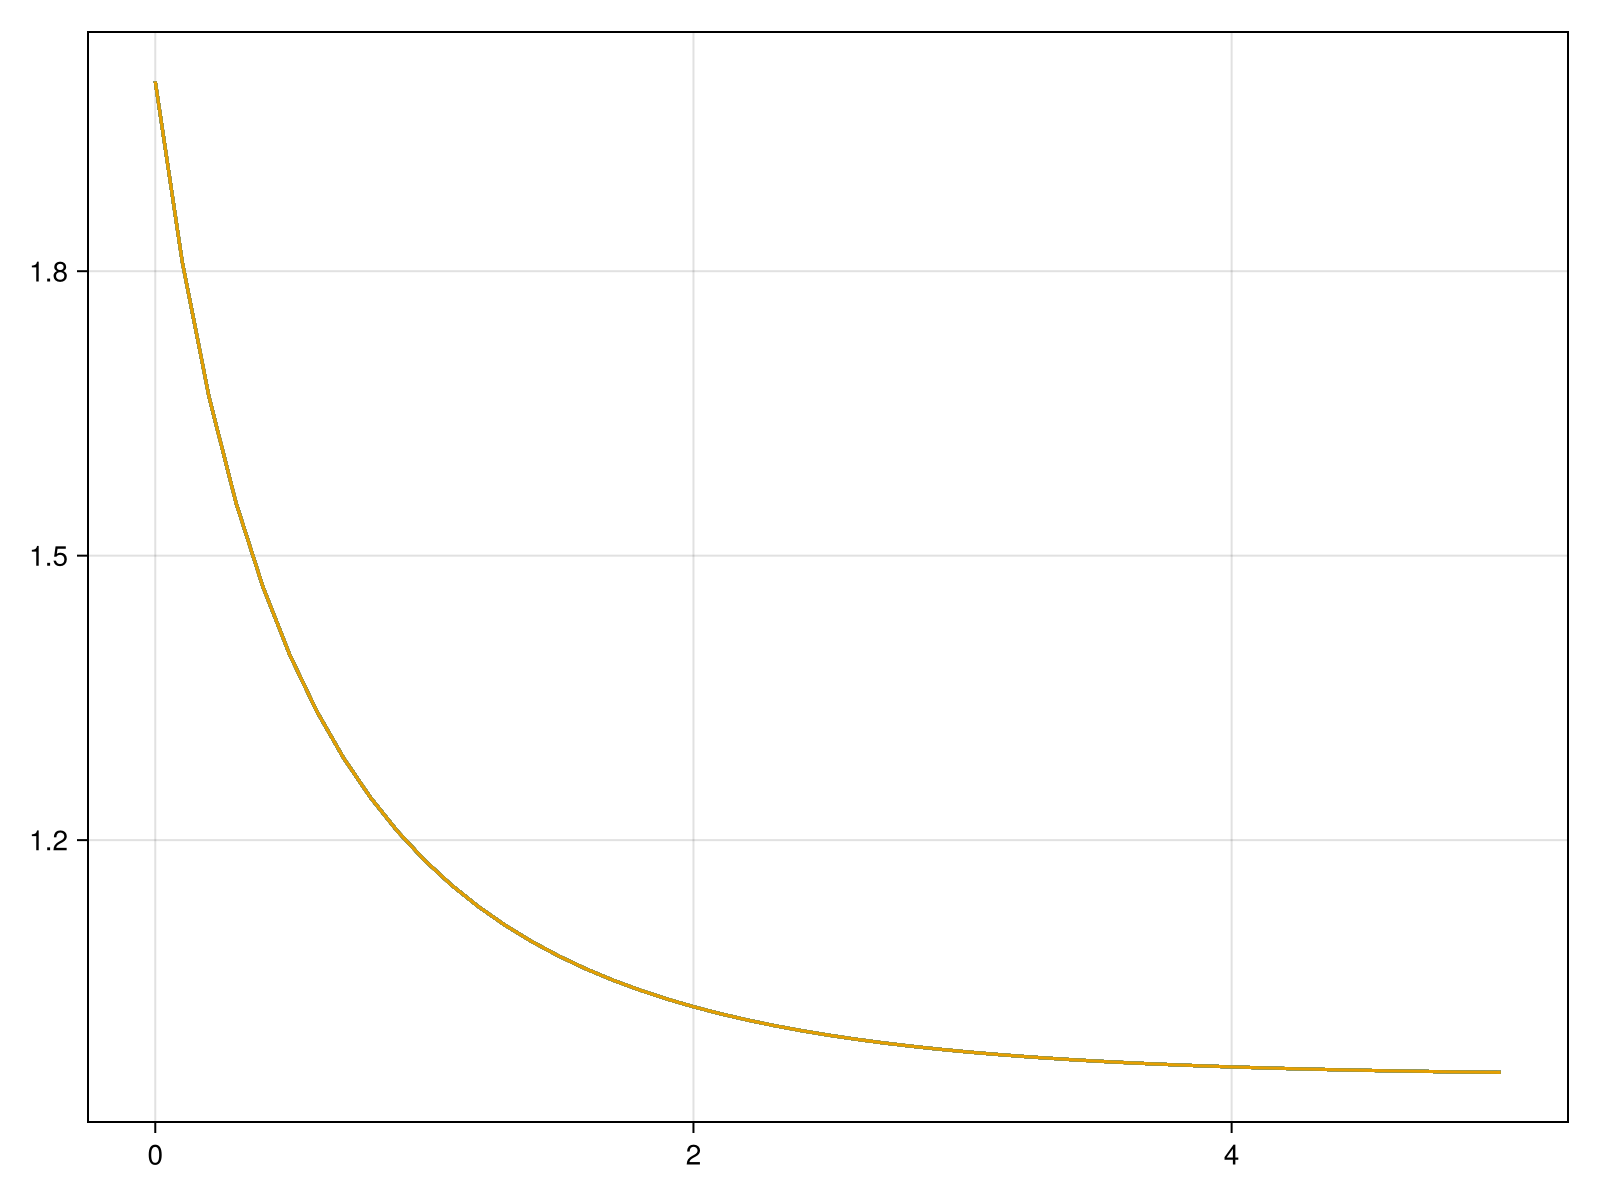

In [102]:
using Random, CairoMakie

Random.seed!(1234)

noPaths = 100

Xzero = 2

K = 1
r = 1
beta = 0

T = 5

dt = 0.1

t = dt:dt:T

dW = sqrt(dt) * randn(length(t), noPaths)
W = cumsum(dW, dims=1)

numerator = Xzero .* exp.((r * K - 0.5 * beta^2) .* t .+ beta .* W)

integral = cumsum(numerator ./ Xzero, dims=1) * dt
denominator = 1 .+ Xzero * r * integral

S = numerator ./ denominator

fig = Figure(resolution = (800, 600))

ax = Axis(fig[1, 1])

for i in 1:noPaths
    lines!(ax, [0; t], [Xzero; S[:, i]])
end

fig